In [4]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


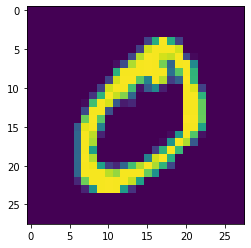

In [5]:
import numpy as np
import gzip
parse = lambda file: np.frombuffer(gzip.open(file).read(), dtype=np.uint8).copy()
X_train = parse("data/train-images-idx3-ubyte.gz")[0x10:].reshape((-1, 28, 28))
Y_train = parse("data/train-labels-idx1-ubyte.gz")[8:]

imshow(X_train[1])

fake data torch.Size([4, 784])
torch.Size([4, 784])
tensor([[-0.6041, -0.7909],
        [-0.6573, -0.7304],
        [-0.4426, -1.0282],
        [-0.5331, -0.8838]], grad_fn=<LogSoftmaxBackward>)
real_loss 0.86


/tmp/ipykernel_18412/1015440553.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_x = torch.tensor(real_x)


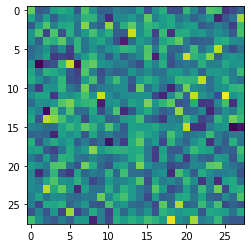

In [29]:
import torch
from gan import Generator, Discriminator 

generator = Generator()
discriminator = Discriminator()

batch_size = 4

def generator_batch():
    samp = np.random.randint(0, X_train.shape[0], size=(batch_size))
    real_x = X_train[samp].reshape(-1, 28*28).astype(np.float32)/255.
    imshow(real_x[0].reshape(-1, 28))
    real_x = (x - 0.5)/0.5
    real_x = torch.tensor(real_x)
    return real_x

y = np.zeros((batch_size,2), dtype=np.float32)
y[:,1] = -2
y = torch.tensor(y)


noise = torch.tensor(np.random.rand(batch_size, 128)).float()
#imshow(noise)
fake_data = generator(noise).detach()
print("fake data", fake_data.shape)
imshow(fake_data.reshape(-1, 28, 28)[0])

print(real_x.shape)
real_out = discriminator(real_x)
print(real_out)
real_loss = (real_out * y).mean()
print(f"real_loss {real_loss.item():.2f}")